# Predicting Used Car Prices



Names: Amy Nguyen and Soojin Choi
Course: Data Science 101
Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Personal Notes:

Notebook cleaning:
* Editing Cells (adding cells, splitting/merging cells, deleting cells)
* Editing Markdown (spell check, grammar check, markdown support)
* Editing Code (e.g. refactoring: renaming, pull method out)

Handing off methods:
* Git Integration (committing and pushing to GitHub repo)
* Presentation Mode (not helpful, looks a bit cluttered and too zoomed in)
* Exporting Plots (save plots, etc)
* Exporting Notebook (only to HTML)

Hey! This is your partner! :)


## Project Summary

There are two main goals we want to achieve with this project:
1) Get a better understanding on the most resladant features that help determine the price of a used vehicle.
2) Estimate the price of used cars by taking into account a set of features, based on historical data.
3) Learn which model is best for predicting car prices.
4) This is meant to demonstrate a commit message for DataSpell

## Exploratory Data Analysis

### Importing the Data

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('vehicles.csv')

In [ ]:
#remove
df.head()

In [ ]:
#remove
df.tail()

### Exploring the Data

In [ ]:
df.nunique(axis=0)  # Returns number of unique value for each variable
df.describe().apply(lambda s: s.apply(lambda x: format(x,
                                                       'f')))  # Code following describe suppresses scientific notation and formats each row to regular format

#remove

#removed import statement looks like a comment
import matplotlib as mlt

#remove
df

In [ ]:
df.condition.unique()  # Wanting to focus on condition


### Cleaning the Data

In [ ]:
# Reclassify condition column
# Columns are redundant, so we want to clean them out

def condition_cleaning(row):
    # Adding some comments to commit?

    #refactor
    x = ['good', 'fair']
    y = ['excellent', 'like new']

    if row.condition in x:
        return 'good'
    if row.condition in y:
        return 'excellent'
    return row.condition  # Clean dataframe


def clean_df(dataframe):
    cleaned_df = df.copy()
    cleaned_df['condition'] = cleaned_df.apply(lambda row: condition_cleaning(row), axis=1)
    return cleaned_df  # Get df with reclassified 'condition' column

df_cleaned = clean_df(df)

print(df_cleaned.condition.unique())

In [10]:
df_cleaned = df_cleaned.copy().drop(['url', 'image_url', 'region_url'], axis=1)
#Remove city url, it's region url!

In [11]:
NA_val = df_cleaned.isna().sum()

def na_filter(na, threshold=.4):  #only select variables that passes the threshold
    col_pass = []
    for i in na.keys():
        if na[i] / df_cleaned.shape[0] < threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [12]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,364076.000000,364076.000000,364076.000000,364076.000000,360715.000000,360715.000000
mean,7311452510.716609,19435.218990,2012.309262,94376.099759,38.516665,-94.138671
std,4391458.441977,14248.973882,5.747604,66759.644660,5.849388,18.048492
min,7301583321.000000,1000.000000,1991.000000,0.000000,-84.122245,-159.719900
25%,7308050685.750000,7995.000000,2009.000000,39082.000000,34.724400,-110.170000
50%,7312519079.500000,15995.000000,2013.000000,88942.000000,39.254962,-87.871739
75%,7315227796.500000,27991.000000,2017.000000,137000.000000,42.356988,-80.759936
max,7317101084.000000,99999.000000,2022.000000,898163.000000,82.252826,167.629911


In [13]:
df_cleaned = df_cleaned.dropna(axis=0)
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


## Correlation Matrix

Through this correlation matrix, we can see the correlation between any two variables

<AxesSubplot:>

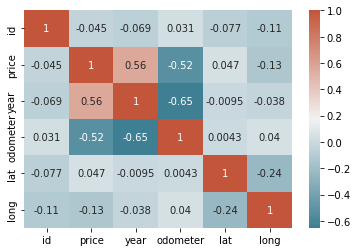

In [14]:
# calculate correlation matrix
corr = df_cleaned.corr()  # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='year', ylabel='price'>

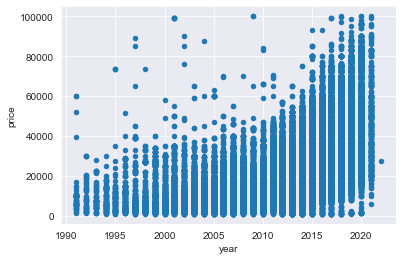

In [55]:
df_cleaned.plot(kind='scatter', x='year', y='price')

<AxesSubplot:xlabel='year', ylabel='price'>

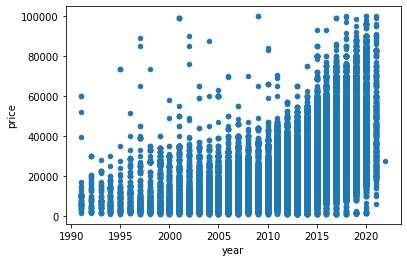

In [16]:
df_cleaned.plot(kind='scatter', x='year', y='price')

### Visualizing the Correlations in the Data between each variable

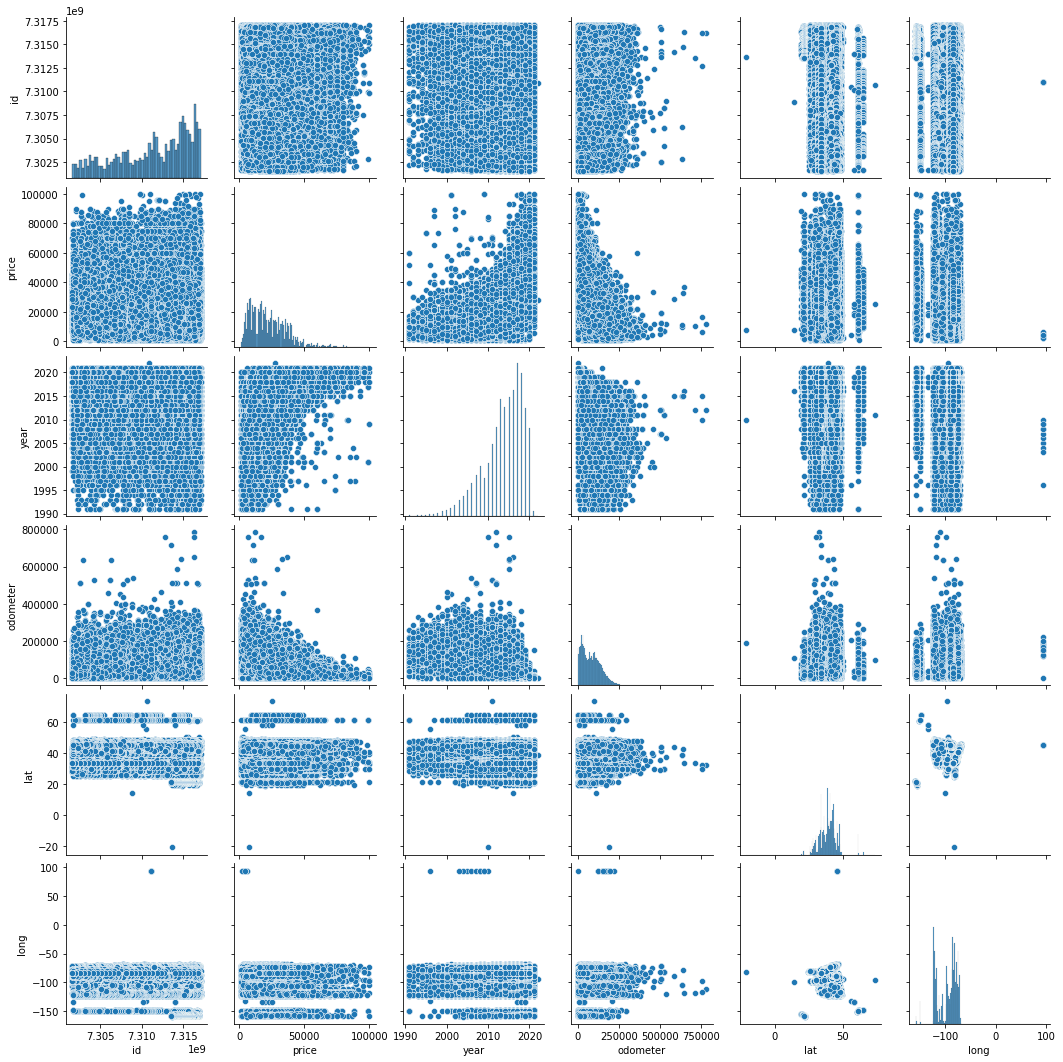

In [17]:
sns.pairplot(df_cleaned)

<AxesSubplot:ylabel='Frequency'>

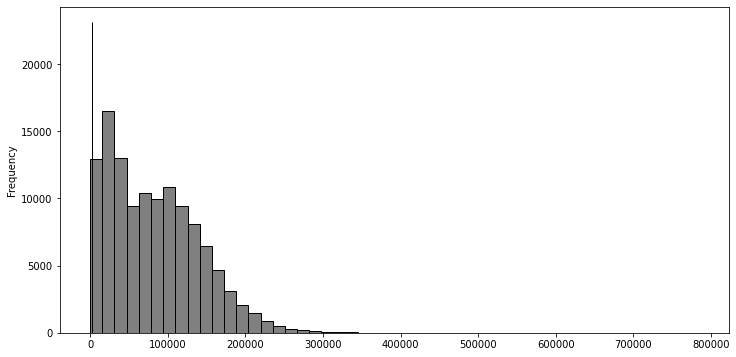

In [18]:
df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12, 6), facecolor='grey', edgecolor='black')
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

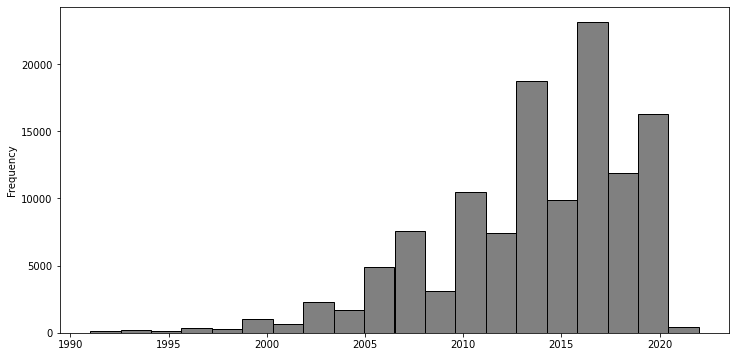

In [19]:
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:>

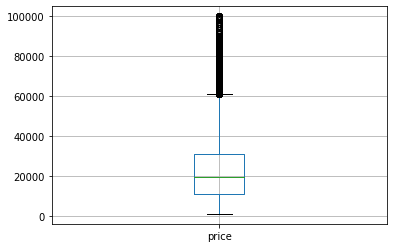

In [20]:
df_cleaned.boxplot('price')

## Conclusion

After doing some exploratory data analysis, we can see that variables with a strong correlation between each other are price/year and price/odometer (mileage). There is a strong positive correlation between price/year and there is a strong negative correlation between price/odometer. This is because newer cars are more likely to be priced higher on the used car market, and cars with higher mileage are less likely to be priced higher because customers do not want a car with higher mileage.